In [136]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train_target.csv
/kaggle/input/titanic/cleaned_test.csv
/kaggle/input/titanic/cleaned_train.csv
/kaggle/input/titanic-original/train.csv
/kaggle/input/titanic-original/test.csv


In [137]:
df_train=pd.read_csv('../input/titanic-original/train.csv')
df_test=pd.read_csv('../input/titanic-original/test.csv')


In [138]:
train=df_train.copy()
test=df_test.copy()

In [139]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [140]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [141]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [142]:
train[(train['Pclass']==1) & (train['Survived']==1) & (train['Sex']=='female')]['Embarked'].value_counts()

S    46
C    42
Q     1
Name: Embarked, dtype: int64

In [143]:
train.loc[train['Ticket']=='113572','Embarked']='S'

In [144]:
train['Title']=train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [145]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


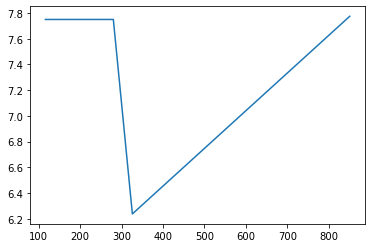

In [146]:
train[(train['Pclass']==3) & (train['Sex']=='male') & (train['Title']=='Mr') & (train['Age']>60)]['Fare'].plot()

In [147]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
dtype: object

In [148]:
test.loc[test['PassengerId']==1044,'Fare']=7.51

In [149]:
test['Title']=test['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())

In [150]:
cols=['Name','Ticket','Cabin']
train=train.drop(columns=cols)
test=test.drop(columns=cols)

In [151]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
the Countess      1
Don               1
Lady              1
Mme               1
Ms                1
Jonkheer          1
Sir               1
Capt              1
Name: Title, dtype: int64

In [152]:
titles_m={
    "Capt": "Rare",
    "Col": "Rare",
    "Major": "Rare",
    "Jonkheer": "Rare",
    "Don": "Rare",
    "Dona": "Miss",
    "Sir" : "Rare",
    "Dr": "Rare",
    "Rev": "Rare",
    "the Countess":"Rare",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Rare"
}


In [153]:
train[train['Age'].isnull()]['Title'].value_counts()

Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: Title, dtype: int64

In [154]:
test[test['Age'].isnull()]['Title'].value_counts()

Mr        57
Miss      14
Mrs       10
Master     4
Ms         1
Name: Title, dtype: int64

In [155]:
train[train['Title']=='Dr']

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
245,246,0,1,male,44.0,2,0,90.0000,Q,Dr
317,318,0,2,male,54.0,0,0,14.0000,S,Dr
398,399,0,2,male,23.0,0,0,10.5000,S,Dr
632,633,1,1,male,32.0,0,0,30.5000,C,Dr
660,661,1,1,male,50.0,2,0,133.6500,S,Dr
766,767,0,1,male,NaN,0,0,39.6000,C,Dr
796,797,1,1,female,49.0,0,0,25.9292,S,Dr


In [156]:
train.loc[train['PassengerId']==767,'Age']=36

In [157]:
train[(train['Title']=='Master' )]['Age'].mean()

4.574166666666667

In [158]:
train.loc[(train['Title']=='Master')& (train['Age'].isnull()),['Age']]=5

In [159]:
test[test['Title']=='Master']['Age'].mean()

7.406470588235294

In [160]:
test.loc[(test['Title']=='Master')& (test['Age'].isnull()),['Age']]=7.4

In [161]:
train.Title=train.Title.map(titles_m)
test.Title=test.Title.map(titles_m)

In [162]:
train[train['Age'].isnull()]['Title'].value_counts()

Mr      119
Miss     36
Mrs      17
Name: Title, dtype: int64

In [163]:
train[(train['Title']=='Mrs') & (train['Age'].isnull())]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
19,20,1,3,female,NaN,0,0,7.2250,C,Mrs
31,32,1,1,female,NaN,1,0,146.5208,C,Mrs
140,141,0,3,female,NaN,0,2,15.2458,C,Mrs
166,167,1,1,female,NaN,0,1,55.0000,S,Mrs
186,187,1,3,female,NaN,1,0,15.5000,Q,Mrs
256,257,1,1,female,NaN,0,0,79.2000,C,Mrs
334,335,1,1,female,NaN,1,0,133.6500,S,Mrs
347,348,1,3,female,NaN,1,0,16.1000,S,Mrs
367,368,1,3,female,NaN,0,0,7.2292,C,Mrs
375,376,1,1,female,NaN,1,0,82.1708,C,Mrs


In [164]:
mean=train.loc[(train['Title']=="Mrs") & (train['Embarked']=='S')]['Age'].mean()
mean

35.92941176470588

In [165]:
train.loc[(train['Title']=='Mrs') & (train['Embarked']=='S') & (train['Age'].isnull()),'Age']=mean

In [166]:
m=train[(train['Title']=="Mrs") & (train['Embarked']=='C')]['Age'].mean()

In [167]:
train.loc[(train['Title']=="Mrs") & (train['Embarked']=='C')& (train['Age'].isnull()),'Age']=m

In [168]:
train.loc[train['PassengerId']==187,'Age']=32

In [169]:
train[(train['Title']=='Mr') & (train['Age'].isnull())]['Pclass'].value_counts()

3    90
1    20
2     9
Name: Pclass, dtype: int64

In [170]:
m1=train[(train['Title']=='Mr') & (train['Pclass']==3) & (train['Embarked']=='S')]['Age'].mean()
m2=train[(train['Title']=='Mr') & (train['Pclass']==3) & (train['Embarked']=='C')]['Age'].mean()
m3=train[(train['Title']=='Mr') & (train['Pclass']==3) & (train['Embarked']=='Q')]['Age'].mean()
train.loc[(train['Title']=='Mr') & (train['Pclass']==3) & (train['Embarked']=='S') & (train['Age'].isnull()),'Age']=m1
train.loc[(train['Title']=='Mr') & (train['Pclass']==3) & (train['Embarked']=='C') & (train['Age'].isnull()),'Age']=m2
train.loc[(train['Title']=='Mr') & (train['Pclass']==3) & (train['Embarked']=='Q') & (train['Age'].isnull()),'Age']=m3


In [171]:
m1=train[(train['Title']=='Mr') & (train['Pclass']==2) & (train['Embarked']=='S')]['Age'].mean()
m2=train[(train['Title']=='Mr') & (train['Pclass']==2) & (train['Embarked']=='C')]['Age'].mean()
train.loc[(train['Title']=='Mr') & (train['Pclass']==2) & (train['Embarked']=='S') & (train['Age'].isnull()),'Age']=m1
train.loc[(train['Title']=='Mr') & (train['Pclass']==2) & (train['Embarked']=='C') & (train['Age'].isnull()),'Age']=m2

In [172]:
m1=train[(train['Title']=='Mr') & (train['Pclass']==1) & (train['Embarked']=='S')]['Age'].mean()
m2=train[(train['Title']=='Mr') & (train['Pclass']==1) & (train['Embarked']=='C')]['Age'].mean()
train.loc[(train['Title']=='Mr') & (train['Pclass']==1) & (train['Embarked']=='S') & (train['Age'].isnull()),'Age']=42.7
train.loc[(train['Title']=='Mr') & (train['Pclass']==1) & (train['Embarked']=='C') & (train['Age'].isnull()),'Age']=39.6

In [173]:
train[train['Age'].isnull()]['Title'].value_counts()

Miss    36
Name: Title, dtype: int64

In [174]:
train[(train['Title']=='Miss') & (train['Age'].isnull())]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
28,29,1,3,female,NaN,0,0,7.8792,Q,Miss
32,33,1,3,female,NaN,0,0,7.7500,Q,Miss
47,48,1,3,female,NaN,0,0,7.7500,Q,Miss
82,83,1,3,female,NaN,0,0,7.7875,Q,Miss
109,110,1,3,female,NaN,1,0,24.1500,Q,Miss
128,129,1,3,female,NaN,1,1,22.3583,C,Miss
180,181,0,3,female,NaN,8,2,69.5500,S,Miss
198,199,1,3,female,NaN,0,0,7.7500,Q,Miss
229,230,0,3,female,NaN,3,1,25.4667,S,Miss
235,236,0,3,female,NaN,0,0,7.5500,S,Miss


In [175]:
train[train['SibSp']==8]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
159,160,0,3,male,5.000000,8,2,69.55,S,Master
180,181,0,3,female,NaN,8,2,69.55,S,Miss
201,202,0,3,male,28.530612,8,2,69.55,S,Mr
324,325,0,3,male,28.530612,8,2,69.55,S,Mr
792,793,0,3,female,NaN,8,2,69.55,S,Miss
846,847,0,3,male,28.530612,8,2,69.55,S,Mr
863,864,0,3,female,NaN,8,2,69.55,S,Miss


In [176]:
m1=train[(train['Title']=="Miss") & (train['Pclass']==3) & (train['Embarked']=='Q')]['Age'].mean()
m2=train[(train['Title']=="Miss") & (train['Pclass']==3) & (train['Embarked']=='S')]['Age'].mean()
m3=train[(train['Title']=="Miss") & (train['Pclass']==3) & (train['Embarked']=='C')]['Age'].mean()
train.loc[(train['Title']=="Miss") & (train['Pclass']==3) & (train['Embarked']=='Q') & (train['Age'].isnull()),'Age']=m1
train.loc[(train['Title']=="Miss") & (train['Pclass']==3) & (train['Embarked']=='S') & (train['Age'].isnull()),'Age']=m2
train.loc[(train['Title']=="Miss") & (train['Pclass']==3) & (train['Embarked']=='C') & (train['Age'].isnull()),'Age']=m3

In [177]:
train[(train['Title']=='Miss') & (train['Age'].isnull())]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
303,304,1,2,female,NaN,0,0,12.3500,Q,Miss
306,307,1,1,female,NaN,0,0,110.8833,C,Miss
596,597,1,2,female,NaN,0,0,33.0000,S,Miss


In [178]:
train.loc[(train.Title=='Miss') & (train.Pclass==2) & (train.Embarked=='Q') & train['Age'].isnull(),'Age']=30


In [179]:
train.loc[train['PassengerId']==597,'Age']=26

In [180]:
train[(train.Title=='Miss') & (train.Pclass==1) & (train.Embarked=='C') ]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
177,178,0,1,female,50.0,0,0,28.7125,C,Miss
195,196,1,1,female,58.0,0,0,146.5208,C,Miss
215,216,1,1,female,31.0,1,0,113.2750,C,Miss
218,219,1,1,female,32.0,0,0,76.2917,C,Miss
258,259,1,1,female,35.0,0,0,512.3292,C,Miss
306,307,1,1,female,NaN,0,0,110.8833,C,Miss
309,310,1,1,female,30.0,0,0,56.9292,C,Miss
310,311,1,1,female,24.0,0,0,83.1583,C,Miss
311,312,1,1,female,18.0,2,2,262.3750,C,Miss
325,326,1,1,female,36.0,0,0,135.6333,C,Miss


In [181]:
df_train[df_train['Fare']==110.8833]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C68,C
698,699,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C


In [182]:
train.loc[train['PassengerId']==307,'Age']=17

In [183]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

In [184]:
y=df_train['Survived']
df_train.drop('Survived',axis=1,inplace=True)


In [185]:
df=pd.concat([df_train,df_test])
df.shape

(1309, 11)

In [186]:
test[test.Age.isnull()]['Title'].value_counts()

Mr      57
Miss    14
Mrs     11
Name: Title, dtype: int64

In [187]:
test[(test['Title']=='Mrs') & (test['Age'].isnull())]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
22,914,1,female,NaN,0,0,31.6833,S,Mrs
33,925,3,female,NaN,1,2,23.4500,S,Mrs
65,957,2,female,NaN,0,0,21.0000,S,Mrs
88,980,3,female,NaN,0,0,7.7500,Q,Mrs
132,1024,3,female,NaN,0,4,25.4667,S,Mrs
168,1060,1,female,NaN,0,0,27.7208,C,Mrs
199,1091,3,female,NaN,0,0,8.1125,S,Mrs
225,1117,3,female,NaN,0,2,15.2458,C,Mrs
249,1141,3,female,NaN,1,0,14.4542,C,Mrs
365,1257,3,female,NaN,1,9,69.5500,S,Mrs


In [188]:
m1=test[(test['Title']=='Mrs') & (test['Pclass']==1) & (test['Embarked']=='S')]['Age'].mean()
m2=test[(test['Title']=='Mrs') & (test['Pclass']==1) & (test['Embarked']=='C')]['Age'].mean()
m3=test[(test['Title']=='Mrs') & (test['Pclass']==2) & (test['Embarked']=='S')]['Age'].mean()
m4=test[(test['Title']=='Mrs') & (test['Pclass']==3) & (test['Embarked']=='S')]['Age'].mean()
m5=30#test[(test['Title']=='Mrs') & (test['Pclass']==3) & (test['Embarked']=='C')]
test.loc[(test['Title']=='Mrs') & (test['Pclass']==1) & (test['Embarked']=='S'),'Age']=m1
test.loc[(test['Title']=='Mrs') & (test['Pclass']==1) & (test['Embarked']=='C'),'Age']=m2
test.loc[(test['Title']=='Mrs') & (test['Pclass']==2) & (test['Embarked']=='S'),'Age']=m3
test.loc[(test['Title']=='Mrs') & (test['Pclass']==3) & (test['Embarked']=='S'),'Age']=m4
test.loc[(test['Title']=='Mrs') & (test['Pclass']==3) & (test['Embarked']=='C'),'Age']=m5

In [189]:
df[(df['Fare']==7.75) &( df['Pclass']==3) & (df['Sex']=='female')]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
32,33,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.75,NaN,Q
47,48,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.75,NaN,Q
141,142,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.75,NaN,S
198,199,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.75,NaN,Q
208,209,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.75,NaN,Q
264,265,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.75,NaN,Q
274,275,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.75,NaN,Q
276,277,3,"Lindblom, Miss. Augusta Charlotta",female,45.0,0,0,347073,7.75,NaN,S
289,290,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.75,NaN,Q
300,301,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.75,NaN,Q


In [190]:
test.loc[test['PassengerId']==980,'Age']=train[train['Title']=='Mrs']['Age'].mean()

In [191]:
test[test.Age.isnull()]['Title'].value_counts()

Mr      57
Miss    14
Name: Title, dtype: int64

In [192]:
test[(test['Title']=='Miss') & (test.Age.isnull()) & (test['Embarked']=='Q')]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
111,1003,3,female,NaN,0,0,7.7792,Q,Miss
127,1019,3,female,NaN,2,0,23.2500,Q,Miss
160,1052,3,female,NaN,0,0,7.7333,Q,Miss
200,1092,3,female,NaN,0,0,15.5000,Q,Miss
216,1108,3,female,NaN,0,0,7.8792,Q,Miss
227,1119,3,female,NaN,0,0,7.7500,Q,Miss
273,1165,3,female,NaN,1,0,15.5000,Q,Miss
282,1174,3,female,NaN,0,0,7.7500,Q,Miss
304,1196,3,female,NaN,0,0,7.7500,Q,Miss
408,1300,3,female,NaN,0,0,7.7208,Q,Miss


In [193]:
m1=test[(test['Title']=='Miss') & (test['Embarked']=='Q')]['Age'].mean()
m2=test[(test['Title']=='Miss') & (test['Embarked']=='S')]['Age'].mean()
test.loc[(test['Title']=='Miss') & (test.Age.isnull()) & (test['Embarked']=='Q'),'Age']=m1
test.loc[(test['Title']=='Miss') & (test.Age.isnull()) & (test['Embarked']=='S'),'Age']=m2

In [194]:
m1=test[(test['Title']=='Mr') & (test['Pclass']==3)]['Age'].mean()
m2=test[(test['Title']=='Mr') & (test['Pclass']==2)]['Age'].mean()
m3=test[(test['Title']=='Mr') & (test['Pclass']==1) & (test['Embarked']=='S')]['Age'].mean()
m4=test[(test['Title']=='Mr') & (test['Pclass']==1) & (test['Embarked']=='C')]['Age'].mean()
test.loc[(test['Title']=='Mr') & (test['Pclass']==3) & (test.Age.isnull()),'Age']=m1
test.loc[(test['Title']=='Mr') & (test['Pclass']==2) & (test.Age.isnull()),'Age']=m2
test.loc[(test['Title']=='Mr') & (test['Pclass']==1) &(test['Embarked']=='S')& (test.Age.isnull()),'Age']=m3
test.loc[(test['Title']=='Mr') & (test['Pclass']==1) &(test['Embarked']=='C') & (test.Age.isnull()),'Age']=m4

In [195]:
def get_family(x):
    x['Family']=x['SibSp']+x['Parch']+1
    return x
train=get_family(train)
test=get_family(test)

In [196]:
train.dtypes,test.dtypes

(PassengerId      int64
 Survived         int64
 Pclass           int64
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Fare           float64
 Embarked        object
 Title           object
 Family           int64
 dtype: object,
 PassengerId      int64
 Pclass           int64
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Fare           float64
 Embarked        object
 Title           object
 Family           int64
 dtype: object)

In [197]:
target=train['Survived']
train=train.drop(['PassengerId','Survived','SibSp'],axis=1)
passId=test['PassengerId']
test=test.drop(['PassengerId','SibSp'],axis=1)

In [198]:
sex_map = {"male": 1, "female": 0}
embark_map={"S": 1, "Q": 2, "C": 3}
title_map={"Mr": 1, "Master": 2, "Mrs": 3,"Miss": 4, "Rare": 5}
train.Sex=train.Sex.map(sex_map).astype(str)
train.Embarked=train.Embarked.map(embark_map).astype(str)
train.Title=train.Title.map(title_map).astype(str)
test.Sex=test.Sex.map(sex_map).astype(str)
test.Embarked=test.Embarked.map(embark_map).astype(str)
test.Title=test.Title.map(title_map).astype(str)

In [199]:
train.shape,test.shape,target.shape

((891, 8), (418, 8), (891,))

In [200]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score,train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

In [201]:
params = {
    'n_estimators':[100,200,400,500,800],'max_features':['auto','sqrt','log2'],'max_depth' : [4,5,6,7,8],
     'min_samples_leaf': [2,10,50]}
kf=StratifiedKFold(n_splits=6,random_state=10,shuffle=True)
rfc1=RandomForestClassifier()
gscv1=GridSearchCV(estimator=rfc1,param_grid=params,cv=kf,n_jobs=-1)

In [165]:
gscv1.fit(train,target)

KeyboardInterrupt: 

In [ ]:
gscv1.best_params_

In [202]:
x_train,x_test,y_train,y_test=train_test_split(train,target,test_size=0.2,stratify=target,random_state=100)

In [203]:
rfc1 = RandomForestClassifier(n_estimators=500,max_depth=8,criterion='gini',max_features='log2')
rfc1.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=500)

In [204]:
score = cross_val_score(rfc1,train,target,scoring = 'accuracy',cv=kf)
score

array([0.85234899, 0.81208054, 0.85234899, 0.83108108, 0.82432432,
       0.84459459])

In [205]:
y_pred=rfc1.predict(x_test)
accuracy_score(y_test,y_pred)


0.8603351955307262

In [206]:
prediction1=rfc1.predict(test)
res1=pd.DataFrame({
                    'PassengerId':passId,
                   'Survived':prediction1})
res1.to_csv('mod1.csv',index=False)

In [239]:
params = {
    'n_estimators':[100,200,400,500,800],'max_features':['auto','sqrt'],'max_depth' : [4,5,6,7,8],
     'min_samples_leaf': [2,5,10]}
rfc2=RandomForestClassifier()
gscv2=GridSearchCV(estimator=rfc2,param_grid=params,cv=kf,n_jobs=-1)
gscv2.fit(x_train,y_train)

KeyboardInterrupt: 

In [207]:
rfc2=RandomForestClassifier(n_estimators=500,min_samples_leaf=5,max_features='auto',max_depth=8)
rfc2.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=5, n_estimators=500)

In [208]:
accuracy_score(y_test,rfc2.predict(x_test))

0.8659217877094972

In [209]:
cross_val_score(rfc2,train,target,scoring = 'accuracy',cv=kf)

array([0.83892617, 0.81208054, 0.81879195, 0.83783784, 0.85135135,
       0.85135135])

In [210]:
prediction2=rfc2.predict(test)
res2=pd.DataFrame({
                    'PassengerId':passId,
                   'Survived':prediction2})
res2.to_csv('mod2.csv',index=False)

In [ ]:
params = {
    'n_estimators':[200,300,400,500],'max_features':['auto','sqrt','log2'],'max_depth' : [4,5],
     'min_samples_leaf': [2,5,10]}
rfc3=RandomForestClassifier()
gscv3=GridSearchCV(estimator=rfc3,param_grid=params,cv=kf,n_jobs=-1)
gscv3.fit(x_train,y_train)

In [211]:
rfc3=RandomForestClassifier(n_estimators=200,max_features='log2',min_samples_leaf=5,max_depth=5)
rfc3.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=5,
                       n_estimators=200)

In [212]:
cross_val_score(rfc3,train,target,scoring = 'accuracy',cv=kf)

array([0.83221477, 0.81208054, 0.82550336, 0.83108108, 0.84459459,
       0.84459459])

In [213]:
accuracy_score(y_test,rfc3.predict(x_test))

0.8603351955307262

In [214]:
prediction3=rfc3.predict(test)
res3=pd.DataFrame({
                    'PassengerId':passId,
                   'Survived':prediction3})
res3.to_csv('mod3.csv',index=False)

In [215]:
x_train,x_test,y_train,y_test=train_test_split(train,target,test_size=0.1,stratify=target)

In [ ]:
params = {
    'n_estimators':[100,200,500,800],'max_features':['auto','sqrt','log2'],'max_depth' : [4,5,6,7,8],
     'min_samples_leaf': [2,5,10]}
rfc4=RandomForestClassifier()
gscv4=GridSearchCV(estimator=rfc4,param_grid=params,cv=kf,n_jobs=-1)
gscv4.fit(x_train,y_train)

In [216]:
rfc4=RandomForestClassifier(n_estimators=200,max_depth=7,max_features='sqrt',min_samples_leaf=5)
rfc4.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, max_features='sqrt', min_samples_leaf=5,
                       n_estimators=200)

In [217]:
cross_val_score(rfc4,train,target,scoring = 'accuracy',cv=kf)

array([0.82550336, 0.81879195, 0.82550336, 0.83783784, 0.85135135,
       0.84459459])

In [218]:
accuracy_score(y_test,rfc4.predict(x_test))

0.8777777777777778

In [219]:
prediction4 = rfc4.predict(test)
res4 = pd.DataFrame({
                    'PassengerId':passId,
                   'Survived':prediction4})
res4.to_csv('mod4.csv',index=False)

In [ ]:
n_estimators = [100,150,180,200,250,400]
learning_r = [0.1,1,0.8,0.9,0.5]

parameters = {'n_estimators':n_estimators,
              'learning_rate':learning_r
              
        }
gscv5 = GridSearchCV(AdaBoostClassifier(base_estimator= None, 
                                     ),
                                 param_grid=parameters,
                                 cv=kf,
                                 n_jobs = -1)
gscv5.fit(x_train,y_train)

In [220]:
rfc5=AdaBoostClassifier(learning_rate=0.8,n_estimators=400)
rfc5.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=400)

In [221]:
cross_val_score(rfc5,train,target,scoring='accuracy',cv=kf)

array([0.82550336, 0.79194631, 0.82550336, 0.7972973 , 0.82432432,
       0.83783784])

In [222]:
accuracy_score(y_train,rfc5.predict(x_train))

0.8664169787765293

In [223]:
prediction5 = rfc5.predict(test)
res5 = pd.DataFrame({
                    'PassengerId':passId,
                   'Survived':prediction5})
res5.to_csv('mod5.csv',index=False)

In [305]:
n_estimators = [100,150,180,200,250,400]
learning_r = [0.05,0.07,0.08,0.1]

parameters = {'n_estimators':n_estimators,
              'learning_rate':learning_r,
              
              
        }
rfc6=GradientBoostingClassifier(max_depth=4,min_samples_split=2,max_features='auto',random_state=10)
gscv6=GridSearchCV(estimator=rfc6,param_grid=parameters,cv=kf,n_jobs=-1)
gscv6.fit(train,target)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=10, shuffle=True),
             estimator=GradientBoostingClassifier(max_depth=4,
                                                  max_features='auto',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.07, 0.08, 0.1],
                         'n_estimators': [100, 150, 180, 200, 250, 400]})

In [306]:
gscv6.best_params_,gscv6.best_score_

({'learning_rate': 0.08, 'n_estimators': 180}, 0.8429016264586734)

In [224]:
rfc6=GradientBoostingClassifier(n_estimators=180,max_depth=4,min_samples_split=2,max_features='auto',learning_rate=0.08)
rfc6.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.08, max_depth=4, max_features='auto',
                           n_estimators=180)

In [225]:
cross_val_score(rfc6,train,target,scoring='accuracy',cv=10)

array([0.82222222, 0.82022472, 0.75280899, 0.87640449, 0.91011236,
       0.84269663, 0.86516854, 0.75280899, 0.83146067, 0.84269663])

In [226]:
accuracy_score(y_test,rfc6.predict(x_test))

0.8777777777777778

In [227]:
prediction6=rfc6.predict(test)
res6=pd.DataFrame({
            'PassengerId':passId,
            'Survived':prediction6
                })
res6.to_csv('mod6.csv',index=False)

In [228]:
n_estimators = [120,140,160,170,180,220]
learning_r = [0.08,0.05,0.04,0.03,0.02,0.01]
parameters = {'n_estimators':n_estimators,
              'learning_rate':learning_r,
              
        }
rfc7=GradientBoostingClassifier(max_depth=5,min_samples_split=2,max_features='log2',random_state=10)
gscv7=GridSearchCV(estimator=rfc7,param_grid=parameters,cv=kf,n_jobs=-1)
gscv7.fit(train,target)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=10, shuffle=True),
             estimator=GradientBoostingClassifier(max_depth=5,
                                                  max_features='log2',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.08, 0.05, 0.04, 0.03, 0.02, 0.01],
                         'n_estimators': [120, 140, 160, 170, 180, 220]})

In [229]:
print(gscv7.best_score_,gscv7.best_params_)


0.8417755003325474 {'learning_rate': 0.02, 'n_estimators': 220}


In [230]:
rfc7=GradientBoostingClassifier(n_estimators=220,max_depth=5,max_features='log2',min_samples_split=2,learning_rate=0.02,random_state=10)

In [231]:
rfc7.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=5, max_features='log2',
                           n_estimators=220, random_state=10)

In [232]:
cross_val_score(rfc7,train,target,scoring='accuracy',cv=kf)

array([0.85234899, 0.81208054, 0.83892617, 0.83108108, 0.86486486,
       0.85135135])

In [233]:
accuracy_score(y_test,rfc7.predict(x_test))

0.8666666666666667

In [234]:
prediction7=rfc7.predict(test)
res7=pd.DataFrame({
            'PassengerId':passId,
            'Survived':prediction7
                })
res7.to_csv('mod7.csv',index=False)

In [235]:
import xgboost as xgb
from xgboost import XGBClassifier
rfc8=XGBClassifier(max_depth=8,min_child_weight=1,
                   n_jobs=-1,booster='gbtree',random_state=10)
parameters = {'n_estimators':[100,130,140,150,160,170],'reg_alpha' : [2,3,4,1,0.1],'subsample':[0.7,0.8,0.9],
              'colsample_bytree':[0.7,0.8,0.9]
              }
gscv8=GridSearchCV(estimator=rfc8,param_grid=parameters,cv=kf)

In [236]:
train1=pd.get_dummies(train)

In [237]:
test1=pd.get_dummies(test)

In [238]:
x_train1,x_test1,y_train1,y_test1=train_test_split(train1,target,test_size=0.1,stratify=target)

In [102]:
gscv8.fit(train,target)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=10, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=8, min_child_weight=1,
                                     missing=...e_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=10,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
            

In [107]:
gscv8.best_params_,gscv8.best_score_

({'colsample_bytree': 0.8,
  'n_estimators': 160,
  'reg_alpha': 2,
  'subsample': 0.9},
 0.8384122377410969)

In [240]:
rfc8=XGBClassifier(n_estimators=160,max_depth=8,min_child_weight=1,subsample=0.9,colsample_bytree=0.8,reg_alpha=2)
rfc8.fit(train1,target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=160, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=2, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [242]:
cross_val_score(rfc8,train1,target,scoring='accuracy',cv=kf)

array([0.83221477, 0.80536913, 0.82550336, 0.81756757, 0.83783784,
       0.85810811])

In [243]:
accuracy_score(y_test1,rfc8.predict(x_test1))

0.9222222222222223

In [121]:
prediction8=rfc8.predict(test)
res8=pd.DataFrame({'PassengerId': passId,'Survived': prediction8})
res8.to_csv('mod8.csv',index=False)

In [122]:
rfc9=XGBClassifier(max_depth=6,min_child_weight=1,
                   n_jobs=-1,booster='gbtree',random_state=10)
parameters = {'n_estimators':[100,130,140,150,160,170],'reg_alpha' : [2,3,4,1,0.1],'subsample':[0.7,0.8,0.9],
              'colsample_bytree':[0.7,0.8,0.9]
              }
gscv9=GridSearchCV(estimator=rfc9,param_grid=parameters,cv=kf)

In [123]:
gscv9.fit(train,target)


GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=10, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=6, min_child_weight=1,
                                     missing=...e_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=10,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
            

In [124]:
gscv9.best_params_,gscv9.best_score_

({'colsample_bytree': 0.9,
  'n_estimators': 130,
  'reg_alpha': 3,
  'subsample': 0.9},
 0.8372936695084346)

In [244]:
rfc9=XGBClassifier(n_estimators=130,max_depth=6,min_child_weight=1,colsample_bytree=0.9,subsample=0.9,reg_alpha=3,
                   n_jobs=-1,booster='gbtree',random_state=10)
rfc9.fit(train1,target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=130, n_jobs=-1, num_parallel_tree=1, random_state=10,
              reg_alpha=3, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [245]:
accuracy_score(y_train1,rfc9.predict(x_train1))

0.9051186017478152

In [247]:
cross_val_score(rfc9,train1,target,scoring='accuracy',cv=kf)

array([0.85234899, 0.79865772, 0.83221477, 0.81756757, 0.86486486,
       0.85810811])

In [134]:
prediction9=rfc9.predict(test)
res9=pd.DataFrame({'PassengerId': passId,'Survived': prediction9})
res9.to_csv('mod9.csv',index=False)

In [258]:
rfc12=AdaBoostClassifier(learning_rate=0.8,n_estimators=400)
rfc12.fit(train,target)

AdaBoostClassifier(learning_rate=0.8, n_estimators=400)

In [259]:
cross_val_score(rfc12,train,target,scoring='accuracy',cv=kf)

array([0.82550336, 0.79194631, 0.82550336, 0.7972973 , 0.82432432,
       0.83783784])

In [260]:
accuracy_score(y_test,rfc12.predict(x_test))

0.9111111111111111

In [261]:
prediction12=rfc12.predict(test)
res12=pd.DataFrame({'PassengerId': passId,'Survived': prediction12})
res12.to_csv('mod12.csv',index=False)